**KACPER HRYNIEWICZ** - DOCUMENT TYPE & COUNTRY ORIGIN RECOGNITION DL MODEL + OCR

The database used for training of this model was MIDV2020, avaliable at http://l3i-share.univ-lr.fr/MIDV2020/midv2020.html.

In [4]:
import cv2
import seaborn_image
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision import datasets, transforms
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import pickle
from sklearn.metrics import precision_recall_fscore_support
import pytesseract
import re
import random

In [5]:
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

DATA PREPARATION FOR DL MODEL

In [3]:
# # CROPPING AND SAVING DOCUMENT IMAGES

# os.makedirs("MIDV2020/dataset/scan_upright/cropped_images", exist_ok=True)

# dir = "MIDV2020/dataset/scan_upright/images/alb_id/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-20]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 0)
    
#     retval, thresh_gray = cv2.threshold(gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     # x, y, w, h = x-30, y-30, w+60, h+60
#     crop = img[y:y+h, x:x+w]
        
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/aze_passport/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-20]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 5)
    
#     retval, thresh_gray = cv2.threshold(gray, thresh=120, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-90, y-120, w+200, h+220
#     crop = img[y:y+h, x:x+w]
        
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/esp_id/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-20]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 0)
    
#     retval, thresh_gray = cv2.threshold(gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     # x, y, w, h = x-90, y-120, w+200, h+220
#     crop = img[y:y+h, x:x+w]
        
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/est_id/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 1200)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=200, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     # x, y, w, h = x-90, y-120, w+200, h+220
#     crop = img[y:y+h, x:x+w]
        
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/fin_id/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 100)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=148, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-40, y-40, w+80, h+55
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/grc_passport/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 100)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=170, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-25, y-10, w+95, h+100
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/lva_passport/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#     gray = cv2.GaussianBlur(gray, (7, 7), 100)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=160, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-35, y-115, w+60, h+150
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/rus_internalpassport/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-30, y-5, w+50, h+60
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/srb_passport/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     x, y, w, h = x-10, y-5, w+20, h+80
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)
    
# dir = "MIDV2020/dataset/scan_upright/images/svk_id/"
# os.makedirs(dir.replace("images","cropped_images"), exist_ok=True)

# for image in os.listdir(dir):
    
#     img = cv2.imread(dir + image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = img[20:-2000,800:-100]
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
#     gray = cv2.medianBlur(gray, 5)
     
#     retval, thresh_gray = cv2.threshold(gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY_INV)
    
#     points = np.argwhere(thresh_gray==255)
#     points = np.fliplr(points)
#     x, y, w, h = cv2.boundingRect(points)
#     # x, y, w, h = x-10, y-5, w+20, h+80
#     crop = img[y:y+h, x:x+w]
    
#     crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(dir.replace("images","cropped_images") + image, crop)

In [4]:
# CORRELATING DOCUMENT ISSUE COUNTRY AND TYPE TO NUMBERS 0-9, GETTING IMAGES' ASPECT RATIOS

labeldefs = {}
revlabeldefs = {}
counter = 0
for folder in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images"):
    labeldefs[counter] = folder
    revlabeldefs[folder] = counter
    counter += 1
    
ratios = []

for folder in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/"):
    for image in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder):
        image = cv2.imread(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder + "/" + image)
        ratios.append(image.shape[0]/image.shape[1])

In [5]:
# LOADING LABELS AND FIXED SIZE, PADDED IMAGES INTO LISTS OF TENSORS

width = 256
height = np.ceil(width*max(ratios))
classes = 10

transform = transforms.Compose([transforms.ToTensor()])

images = []
labels = []

def BWsizeNpad(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (width, int(image.shape[0] * width / image.shape[1])))
    margin = int((height-image.shape[0])/2)
    image = cv2.copyMakeBorder(image, top=margin, bottom=int(height-margin-image.shape[0]), left=0, right=0, borderType=cv2.BORDER_CONSTANT)
    return image

for folder in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/"):
    for image in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder):
        image = cv2.imread(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder + "/" + image)
        image = transform(BWsizeNpad(image))
        images.append(image)
        labels.append(revlabeldefs[folder])
        
len(images) == len(labels)

True

In [6]:
# # SAVING OR LOADING DATA

# with open("MIDV2020/images_adjusted.pkl", "wb") as output_file:
#     pickle.dump(images, output_file)

# with open("MIDV2020/labels.pkl", "wb") as output_file:
#     pickle.dump(labels, output_file)

# with open("MIDV2020/images_adjusted.pkl", "rb") as input_file:
#     images = pickle.load(input_file)

# with open("MIDV2020/labels.pkl", "rb") as input_file:
#     labels = pickle.load(input_file)

<Axes: >

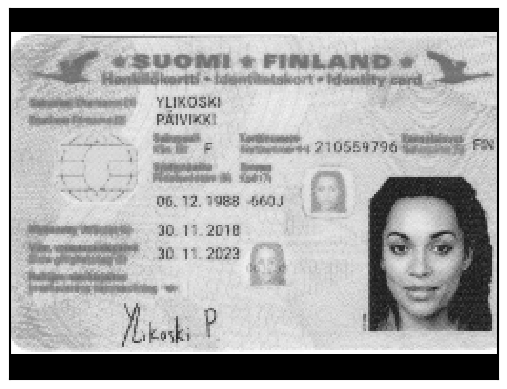

In [7]:
seaborn_image.imgplot(torch.squeeze(images[436]).numpy(), cmap="Greys_r", cbar=False)

In [8]:
# TRAIN-TEST SPLIT AND DATA LOADERS

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=2137)

batchsize = 16

X_train = torch.stack(X_train)
y_train = torch.tensor(y_train)
X_test = torch.stack(X_test)
y_test = torch.tensor(y_test)

X_train = X_train.type(torch.FloatTensor)
y_train = y_train.type(torch.LongTensor)
X_test = X_test.type(torch.FloatTensor)
y_test = y_test.type(torch.LongTensor)

train_data = TensorDataset(X_train, y_train)
test_data  = TensorDataset(X_test, y_test)

train_data_loader = DataLoader(train_data, shuffle=True, batch_size=batchsize, drop_last=True)
test_data_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

ANN ARCHITECTURE

In [11]:
dropoutrate = 0.5
netwidth = 128
secwidth = 128

def ANN_instance():

  class ANN(nn.Module):
    def __init__(self):
      super().__init__()
      
      self.dr = dropoutrate
      insize = 372992
      
      self.conv1 = nn.Conv2d(1,32,kernel_size=5,stride=1,padding=1)
      # self.conv2 = nn.Conv2d(16,32,kernel_size=5,stride=1,padding=1)
      self.bnorm1 = nn.BatchNorm2d(32)
      
      self.conv3 = nn.Conv2d(32,128,kernel_size=5,stride=1,padding=1)
      # # self.conv4 = nn.Conv2d(64,128,kernel_size=5,stride=1,padding=1)
      self.bnorm2 = nn.BatchNorm2d(128)
      
      self.flatten = nn.Flatten()
      
      self.fc1 = nn.Linear(insize,netwidth)
      self.bnorm3 = nn.BatchNorm1d(netwidth)
      
      # self.fc2 = nn.Linear(netwidth,secwidth)
      # self.bnorm4 = nn.BatchNorm1d(secwidth)

      self.out = nn.Linear(secwidth,classes)

    def forward(self,x):

      x = F.max_pool2d(self.conv1(x),2)
      # x = F.max_pool2d(self.conv2(self.conv1(x)),2)
      x = F.leaky_relu(self.bnorm1(x))
      
      x = F.max_pool2d(self.conv3(x),2)
      # x = F.max_pool2d(self.conv4(self.conv3(x)),2)
      x = F.leaky_relu(self.bnorm2(x))

      x = self.flatten(x)

      x = F.relu(self.fc1(x))
      x - self.bnorm3(x)
      x = F.dropout(x, p=self.dr, training=self.training)
      
      # x = F.relu(self.fc2(x))
      # x - self.bnorm4(x)
      # x = F.dropout(x, p=self.dr, training=self.training)

      x = self.out(x)

      return x

  net = ANN()

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.AdamW(net.parameters(),lr=.001, weight_decay=0.02)
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=2,gamma=1/4)

  return net, lossfun, optimizer

TRAINING

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()
print(device)

cuda:0


In [11]:
net, lossfun, optimizer = ANN_instance()

losses = []
train_acc = []
test_acc = []
test_prec = []
test_recall = []
test_fbeta = []

In [12]:
numepochs = 5

net.to(device)

for epochi in range(numepochs):

  net.train()
  batch_acc  = []
  batch_loss = []
  
  for X, y in train_data_loader:

    X = X.to(device)
    y = y.to(device)

    y_hat = net(X)
    loss = lossfun(y_hat,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_hat = y_hat.cpu()
    y = y.cpu()

    batch_loss.append(loss.item())

    matches = torch.argmax(y_hat, axis=1) == y
    matches_num = matches.float()
    accuracy_pic = 100*torch.mean(matches_num)
    batch_acc.append(accuracy_pic)

  currtrain_acc = np.mean(batch_acc)
  train_acc.append(currtrain_acc)

  currloss = np.mean(batch_loss)
  losses.append(currloss)

  net.eval()
  X, y = next(iter(test_data_loader))
  
  X = X.to(device)
  y = y.to(device)
  
  with torch.no_grad():
    y_hat = net(X)

  y_hat = y_hat.cpu()
  y = y.cpu()

  y_hat = torch.argmax(y_hat, dim = 1)
  curracc = 100*torch.mean((y_hat==y).float())
  test_acc.append(curracc)

  prec_rec_fbeta = precision_recall_fscore_support(y, y_hat, average='macro')
  test_prec.append(prec_rec_fbeta[0])
  test_recall.append(prec_rec_fbeta[1])
  test_fbeta.append(prec_rec_fbeta[2])
  
  print(f"Epoch {(epochi)}".ljust(8, " ") + f" | Loss: {round(float(currloss),3)}".ljust(14, " ") + f" | Training Accuracy: {round(float(currtrain_acc),1)}% | Test Accuracy: {round(float(curracc),1)}%")
  
  # if curracc >= 99.9:
  #   break

Epoch 0  | Loss: 4.246 | Training Accuracy: 87.8% | Test Accuracy: 100.0%
Epoch 1  | Loss: 0.481 | Training Accuracy: 98.4% | Test Accuracy: 100.0%
Epoch 2  | Loss: 0.207 | Training Accuracy: 98.7% | Test Accuracy: 100.0%
Epoch 3  | Loss: 0.184 | Training Accuracy: 99.0% | Test Accuracy: 100.0%
Epoch 4  | Loss: 0.538 | Training Accuracy: 98.5% | Test Accuracy: 100.0%


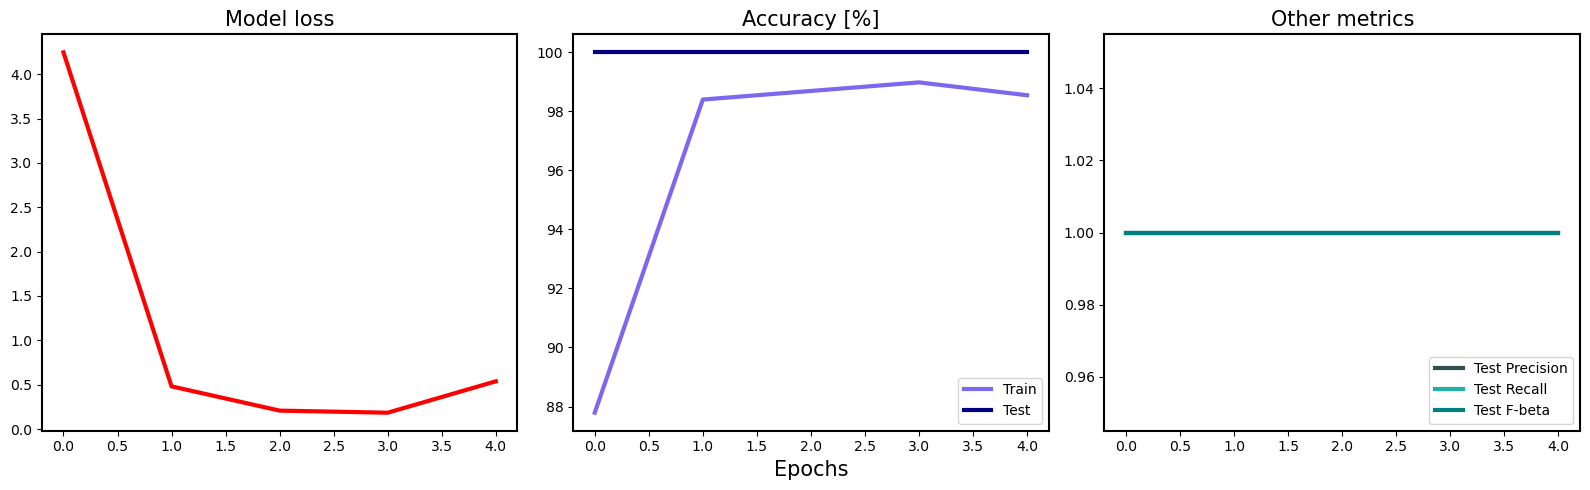

In [13]:
fig,ax = plt.subplots(1, 3, figsize=(16,5))

ax[0].plot(losses, linewidth=3, color="red")
ax[0].set_title('Model loss')

ax[1].plot(train_acc,label='Train', linewidth=3, color="mediumslateblue")
ax[1].plot(test_acc,label='Test', linewidth=3, color="navy")
ax[1].set_xlabel('Epochs')
ax[1].set_title('Accuracy [%]')
ax[1].legend(loc=4)

ax[2].plot(test_prec,label='Test Precision', linewidth=3, color="darkslategray")
ax[2].plot(test_recall,label='Test Recall', linewidth=3, color="lightseagreen")
ax[2].plot(test_fbeta,label='Test F-beta', linewidth=3, color="teal")
ax[2].set_title('Other metrics')
ax[2].legend(loc=4)

fig.tight_layout()
plt.show()

In [12]:
# SAVING/LOADING MODEL

# torch.save(net.state_dict(), 'vis_doc_coutry_verification.pt')

net, lossfun, optimizer = ANN_instance()
net.load_state_dict(torch.load('vis_doc_coutry_verification.pt'))

<All keys matched successfully>

In [8]:
# IF LOADING MODEL, RUN THIS FIRST

ratios = []

for folder in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/"):
    for image in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder):
        image = cv2.imread(r"MIDV2020/dataset/scan_upright/cropped_images/" + folder + "/" + image)
        ratios.append(image.shape[0]/image.shape[1])

classes = 10
width = 256
height = np.ceil(width*max(ratios))
classes = 10
batchsize = 8
transform = transforms.Compose([transforms.ToTensor()])

def BWsizeNpad(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (width, int(image.shape[0] * width / image.shape[1])))
    margin = int((height-image.shape[0])/2)
    image = cv2.copyMakeBorder(image, top=margin, bottom=int(height-margin-image.shape[0]), left=0, right=0, borderType=cv2.BORDER_CONSTANT)
    return image

labeldefs = {}
revlabeldefs = {}
counter = 0
for folder in os.listdir(r"MIDV2020/dataset/scan_upright/cropped_images"):
    labeldefs[counter] = folder
    revlabeldefs[folder] = counter
    counter += 1

OCR FOR ALL 10 DOCUMENT TYPES - READING FIRST NAMES, LAST NAMES AND BIRTH DATES

In [13]:
def getinfo(doctype, imageraw):
    
    # FOR DOCTYPE alb_id
    
    if doctype == 0:
        try:
            firstname  = imageraw[170:210,310:700]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-250)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

            points = np.argwhere(firstname ==255)
            points = np.fliplr(points)
            x, y, w, h = cv2.boundingRect(points)
            x, y, w, h = x-5, y, w+10, h
            firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            firstname = "UNKNOWN"
        
        try:
            surname = imageraw[100:170,310:700]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname, alpha=4, beta=-180)

            surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

            points = np.argwhere(surname==255)
            points = np.fliplr(points)
            x, y, w, h = cv2.boundingRect(points)
            x, y, w, h = x-5, y-5, w+10, h+10
            surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[340:385,310:550]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=4, beta=-280)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = re.split("[- ,._:]", birthdate)
            birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            
        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE aze_passport
    
    if doctype == 1:
        try:
            firstname  = imageraw[335:390,430:700]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-400)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            firstname = "UNKNOWN"
        
        try:
            surname = imageraw[235:280,430:700]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-400)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[480:525,430:700]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=4, beta=-400)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = re.split("[- ,._:]", birthdate)
            birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            
        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE esp_id
    
    if doctype == 2:
        try:
            firstname  = imageraw[205:250,280:700]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-200)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[205:250,280:700]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-200)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[95:145,280:700]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-200)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[95:145,280:700]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-200)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[290:345,275:700]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=4, beta=-200)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = re.split("[- ,._:\";]", birthdate)
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())
            
        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE est_id
    
    if doctype == 3:
        try:
            firstname  = imageraw[205:250,350:650]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[205:250,350:650]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[135:185,350:750]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[135:185,350:750]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[370:420,460:645]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=2, beta=-100)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = re.split("[- ,._:\";]", birthdate)
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())
            
        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE fin_id
    
    if doctype == 4:
        try:
            firstname  = imageraw[155:200,275:600]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[155:200,275:600]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[115:165,275:600]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[115:165,275:600]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[315:365,275:475]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=2, beta=-100)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = re.split("[- ,._]", birthdate.replace(" ", ""))
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
        # FOR DOCTYPE fin_id
    
    # FOR DOCTYPE grc_passport
    
    if doctype == 5:
        try:
            firstname  = imageraw[369:420,460:830]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[369:420,460:830]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[255:305,455:830]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[255:305,455:830]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[480:540,865:1075]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=2, beta=-100)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            birthdate = birthdate.split(" ")
            # birthdate = re.split("[- ,._]", birthdate.replace(" ", ""))
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            if int(birthdate[2]) > 20:
                birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + "19" + ''.join(letter for letter in birthdate[2] if letter.isalnum())
            else:
                birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + "20" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE lva_passport
    
    if doctype == 6:
        try:
            firstname  = imageraw[320:375,425:800]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[320:375,425:800]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-300)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[255:310,425:800]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[255:310,425:800]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-300)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[470:520,420:720]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=2, beta=-100)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            # birthdate = birthdate.split(" ")
            birthdate = re.split("[- ,._]", birthdate.replace(" ", ""))
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE rus_internalpassport
    
    if doctype == 7:
        try:
            firstname  = imageraw[270:345,680:1180]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=2, beta=-200)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname, lang="rus").strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[270:345,680:1180]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=2, beta=-200)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname, lang="rus").strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[345:420,680:1180]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=2, beta=-200)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname, lang="rus").strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[345:420,680:1180]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=2, beta=-200)

                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname, lang="rus").strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[425:510,865:1255]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=2, beta=-200)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            # birthdate = birthdate.split(" ")
            birthdate = re.split("[- ,._]", birthdate.replace(" ", ""))
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE srb_passport
    
    if doctype == 8:
        try:
            firstname  = imageraw[255:310,440:720]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-200)

            # firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[255:310,440:720]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-200)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[195:250,440:720]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-200)

            # surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[195:250,440:720]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-200)
                
                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                # surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[380:425,440:640]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate  = cv2.convertScaleAbs(birthdate , alpha=4, beta=-170)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            # birthdate = birthdate.split(" ")
            birthdate = re.split("[- ,._]", birthdate.replace(" ", ""))
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
    # FOR DOCTYPE svk_id
    
    if doctype == 9:
        try:
            firstname  = imageraw[180:235,335:640]
            firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

            firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-400)

            firstname  = cv2.medianBlur(firstname , 3)
            # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

            retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # firstname  = cv2.medianBlur(firstname , 3)
            
            # points = np.argwhere(firstname ==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # firstname  = firstname [y:y+h, x:x+w]

            firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                firstname  = imageraw[180:235,335:640]
                firstname  = cv2.cvtColor(firstname , cv2.COLOR_BGR2GRAY)

                firstname  = cv2.convertScaleAbs(firstname , alpha=4, beta=-400)

                # firstname  = cv2.medianBlur(firstname , 3)
                # firstname  = cv2.GaussianBlur(firstname , (1, 3), 100)

                retval, firstname  = cv2.threshold(firstname , thresh=140, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                firstname  = cv2.medianBlur(firstname , 3)
                
                # points = np.argwhere(firstname ==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y, w+10, h
                # firstname  = firstname [y:y+h, x:x+w]

                firstname = pytesseract.image_to_string(firstname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                firstname = "UNKNOWN"
        
        try:
            surname = imageraw[120:175,335:640]
            surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

            surname = cv2.convertScaleAbs(surname , alpha=4, beta=-400)

            surname = cv2.medianBlur(surname, 3)
            # surname = cv2.GaussianBlur(surname, (1, 3), 100)

            retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # surname  = cv2.medianBlur(surname , 3)
            
            # points = np.argwhere(surname==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y-5, w+10, h+10
            # surname = surname[y:y+h, x:x+w]

            surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
            firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
        except:
            try:
                surname = imageraw[120:175,335:640]
                surname = cv2.cvtColor(surname, cv2.COLOR_BGR2GRAY)

                surname = cv2.convertScaleAbs(surname , alpha=4, beta=-400)
                
                # surname = cv2.medianBlur(surname, 3)
                # surname = cv2.GaussianBlur(surname, (1, 3), 100)

                retval, surname = cv2.threshold(surname, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                surname  = cv2.medianBlur(surname , 3)
                
                # points = np.argwhere(surname==255)
                # points = np.fliplr(points)
                # x, y, w, h = cv2.boundingRect(points)
                # x, y, w, h = x-5, y-5, w+10, h+10
                # surname = surname[y:y+h, x:x+w]

                surname = pytesseract.image_to_string(surname).strip().split()[0].upper()
                firstname = ''.join(letter for letter in firstname if letter.isalnum())
            
            except:
                surname = "UNKNOWN"
        
        try:
            birthdate  = imageraw[245:295,665:965]
            birthdate  = cv2.cvtColor(birthdate , cv2.COLOR_BGR2GRAY)

            birthdate1  = cv2.convertScaleAbs(birthdate, alpha=2, beta=-40)
            birthdate1 = birthdate1[:,:152]
            birthdate2  = cv2.convertScaleAbs(birthdate, alpha=2, beta=-10)
            birthdate2 = birthdate2[:,152:]

            birthdate = np.concatenate((birthdate1, birthdate2), axis=1)

            # birthdate  = cv2.medianBlur(birthdate , 3)
            # birthdate  = cv2.GaussianBlur(birthdate , (3, 1), 100)

            retval, birthdate  = cv2.threshold(birthdate , thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            # birthdate  = cv2.medianBlur(birthdate , 3)
            
            # points = np.argwhere(birthdate==255)
            # points = np.fliplr(points)
            # x, y, w, h = cv2.boundingRect(points)
            # x, y, w, h = x-5, y, w+10, h
            # birthdate  = birthdate [y:y+h, x:x+w]

            birthdate = pytesseract.image_to_string(birthdate).strip()
            # birthdate = birthdate.split(" ")
            birthdate = re.split("[- ,._]", birthdate)
            # birthdate = birthdate[0] + "-" + birthdate[1] + "-" + birthdate[2]
            birthdate = ''.join(letter for letter in birthdate[0] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[1] if letter.isalnum()) + "-" + ''.join(letter for letter in birthdate[2] if letter.isalnum())

        except:
            birthdate  = "UNKNOWN"
    
    else:
        pass
    
    return firstname, surname, birthdate

TESTING DOCUMENT RECOGNITION MODEL AND OCR

In [14]:
# TEST

def singleIDtest(pick=0, plot=True, net=net, ownimage=False, image=0):

    if ownimage == False:
        doctype = np.ceil((pick+1)/100)-1
        imname = pick-doctype*100
        doctype = labeldefs[doctype]
        imageraw = cv2.imread((r"MIDV2020/dataset/scan_upright/cropped_images/{}/".format(doctype) + "{}.jpg".format(int(imname)).rjust(6, "0")))
        
    else:
        imageraw = image   
        
    image = transform(BWsizeNpad(imageraw))

    if plot == True:
        fig,ax = plt.subplots(1,2,figsize=(12,5))
        seaborn_image.imgplot(cv2.cvtColor(imageraw, cv2.COLOR_BGR2RGB), cbar=False, ax=ax[0])
        seaborn_image.imgplot(torch.squeeze(image).numpy(), cmap="Greys_r", cbar=False, ax=ax[1])
        fig.tight_layout()
    else:
        pass

    test_batch = []
    test_batch.append(image)

    for count in range(batchsize-1):
        test_batch.append(torch.zeros(image.shape))
        
    test_batch = torch.stack(test_batch)

    net = net.cpu()

    doctype = int(torch.argmax(net(test_batch)[0]))

    firstname, surname, birthdate = getinfo(doctype, imageraw)

    print("Document type:", labeldefs[doctype])
    print("Name:", firstname, surname)
    print("Date of birth:", birthdate)

Document type: aze_passport
Name: DURNA AYDINLI
Date of birth: 21-02-1989


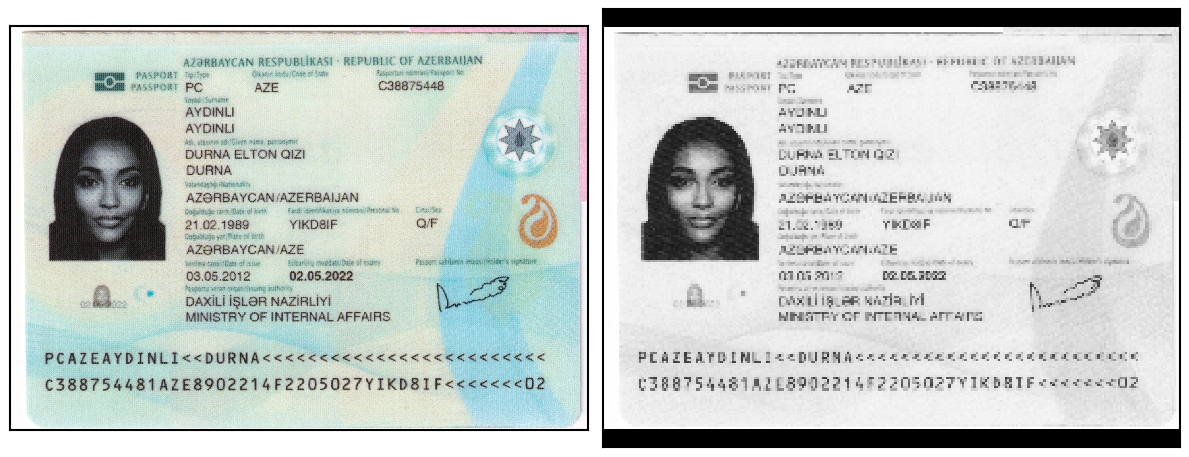

In [15]:
singleIDtest(pick=random.randint(0,999))